In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
data = pd.read_excel('financedata.xlsx')

In [21]:
data.shape

(2630, 4)

In [13]:
data.isnull().sum()

Date           0
Crude_Close    0
Gold_Close     0
DJI_Close      0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2630 non-null   datetime64[ns]
 1   Crude_Close  2630 non-null   float64       
 2   Gold_Close   2630 non-null   float64       
 3   DJI_Close    2630 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 82.3 KB


In [15]:
data

,Date,Crude_Close,Gold_Close,DJI_Close
0,2013-01-02,93.120003,1687.900024,13412.549805
1,2013-01-03,92.919998,1673.699951,13391.360352
2,2013-01-04,93.089996,1648.099976,13435.209961
3,2013-01-07,93.190002,1645.500000,13384.290039
4,2013-01-08,93.150002,1661.500000,13328.849609
...,...,...,...,...
2625,2023-06-08,71.290001,1963.599976,33665.019531
2626,2023-06-09,70.169998,1962.199951,33833.609375
2627,2023-06-12,67.120003,1955.300049,33876.781250
2628,2023-06-13,69.419998,1944.599976,34066.328125


<Axes: >

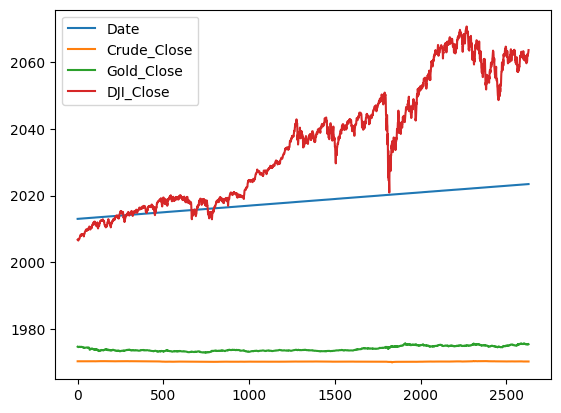

In [16]:
data.plot(kind='line')

In [17]:
data.index = data.Date

In [18]:
data = data.drop("Date",axis =1)

<Axes: xlabel='Date'>

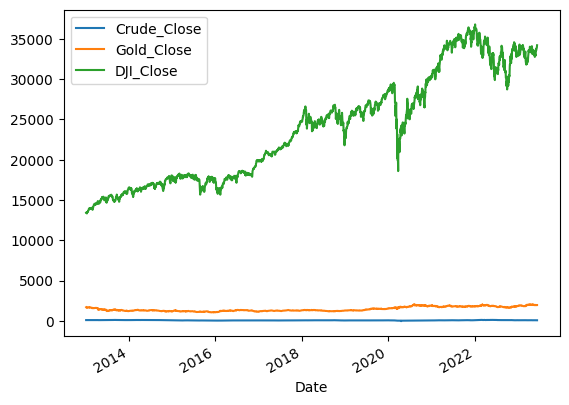

In [19]:
data.plot(kind='line')

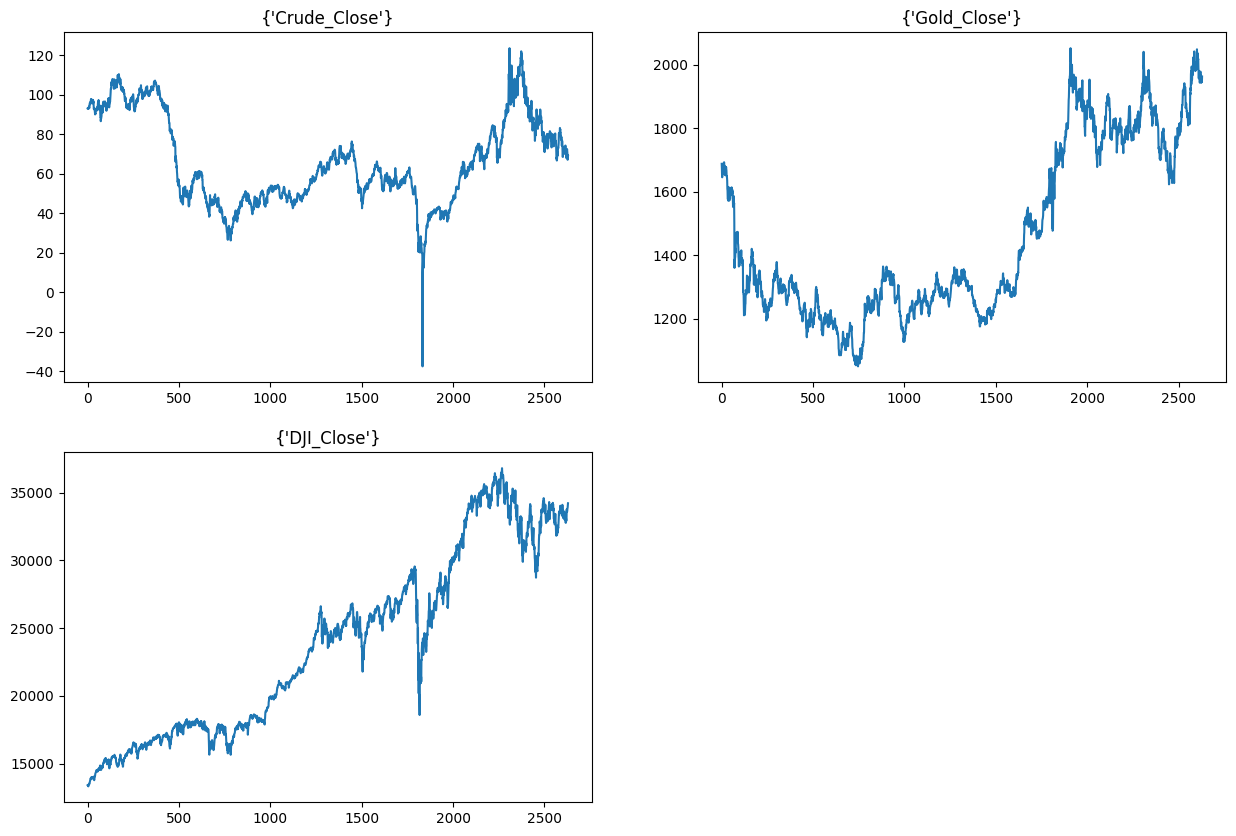

In [23]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.drop("Date",axis = 1).columns,1):
    plt.subplot(2,2,i)
    data[col].plot()
    plt.title({data.drop("Date",axis = 1).columns[i-1]})
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

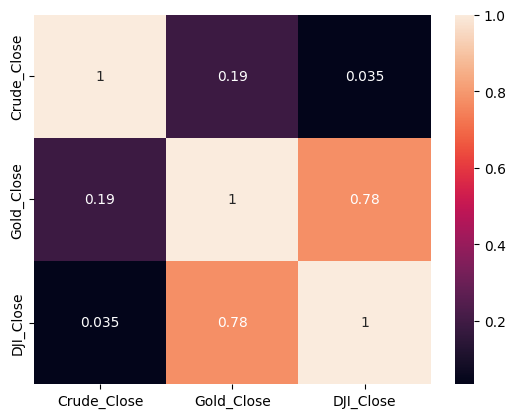

In [27]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Calculate daily return or daily percentage change in close price.
# pct_change = (CurrentDayPrice/PreviousDayPrice)-1

In [29]:
data_return_daily = data.drop("Date",axis=1).pct_change()

In [30]:
data_return_daily

,Crude_Close,Gold_Close,DJI_Close
0,NaN,NaN,NaN
1,-0.002148,-0.008413,-0.001580
2,0.001830,-0.015295,0.003274
3,0.001074,-0.001578,-0.003790
4,-0.000429,0.009723,-0.004142
...,...,...,...
2625,-0.017096,0.010758,0.002732
2626,-0.015711,-0.000713,0.005008
2627,-0.043466,-0.003516,0.001276
2628,0.034267,-0.005472,0.005595


In [31]:
data_return_daily = data_return_daily.dropna()

In [32]:
data_return_daily

,Crude_Close,Gold_Close,DJI_Close
1,-0.002148,-0.008413,-0.001580
2,0.001830,-0.015295,0.003274
3,0.001074,-0.001578,-0.003790
4,-0.000429,0.009723,-0.004142
5,-0.000537,-0.004032,0.004626
...,...,...,...
2625,-0.017096,0.010758,0.002732
2626,-0.015711,-0.000713,0.005008
2627,-0.043466,-0.003516,0.001276
2628,0.034267,-0.005472,0.005595


<Axes: >

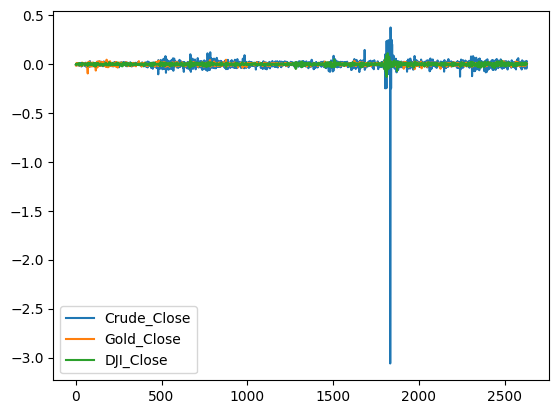

In [33]:
data_return_daily.plot()

In [34]:
data_return_daily.describe()

,Crude_Close,Gold_Close,DJI_Close
count,2629.000000,2629.000000,2629.000000
mean,-0.001129,0.000106,0.000416
std,0.070575,0.009845,0.010864
min,-3.059661,-0.093538,-0.129265
25%,-0.011940,-0.004561,-0.003751
50%,0.001084,0.000160,0.000628
75%,0.012454,0.005100,0.005333
max,0.376623,0.059477,0.113650


In [38]:
data_return_daily['Date'] = data.Date.drop(data.index[:1])

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\1569231963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_return_daily['Date'] = data.Date.drop(data.index[:1])


In [41]:
data_return_daily.head()

,Crude_Close,Gold_Close,DJI_Close,Date
1,-0.002148,-0.008413,-0.001580,2013-01-03
2,0.001830,-0.015295,0.003274,2013-01-04
3,0.001074,-0.001578,-0.003790,2013-01-07
4,-0.000429,0.009723,-0.004142,2013-01-08
5,-0.000537,-0.004032,0.004626,2013-01-09


In [42]:
data_return_daily.tail()

,Crude_Close,Gold_Close,DJI_Close,Date
2625,-0.017096,0.010758,0.002732,2023-06-08
2626,-0.015711,-0.000713,0.005008,2023-06-09
2627,-0.043466,-0.003516,0.001276,2023-06-12
2628,0.034267,-0.005472,0.005595,2023-06-13
2629,0.000288,0.008999,0.004280,2023-06-14


In [43]:
data_return_daily.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2629 entries, 1 to 2629
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Crude_Close  2629 non-null   float64       
 1   Gold_Close   2629 non-null   float64       
 2   DJI_Close    2629 non-null   float64       
 3   Date         2629 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 102.7 KB


In [44]:
data_return_daily['Weekday'] = data_return_daily.Date.dt.weekday

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\3426962389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_return_daily['Weekday'] = data_return_daily.Date.dt.weekday


In [46]:
data_return_daily['Month'] = data_return_daily.Date.dt.month

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\2100866096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_return_daily['Month'] = data_return_daily.Date.dt.month


In [48]:
data_return_daily['Quarter'] = data_return_daily.Date.dt.quarter

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\14593422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_return_daily['Quarter'] = data_return_daily.Date.dt.quarter


In [49]:
data_return_daily['Year'] = data_return_daily.Date.dt.year

C:\Users\Hp\AppData\Local\Temp\ipykernel_3120\1649393839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_return_daily['Year'] = data_return_daily.Date.dt.year


In [50]:
data_return_daily

,Crude_Close,Gold_Close,DJI_Close,Date,Weekday,Month,Quarter,Year
1,-0.002148,-0.008413,-0.001580,2013-01-03,3,1,1,2013
2,0.001830,-0.015295,0.003274,2013-01-04,4,1,1,2013
3,0.001074,-0.001578,-0.003790,2013-01-07,0,1,1,2013
4,-0.000429,0.009723,-0.004142,2013-01-08,1,1,1,2013
5,-0.000537,-0.004032,0.004626,2013-01-09,2,1,1,2013
...,...,...,...,...,...,...,...,...
2625,-0.017096,0.010758,0.002732,2023-06-08,3,6,2,2023
2626,-0.015711,-0.000713,0.005008,2023-06-09,4,6,2,2023
2627,-0.043466,-0.003516,0.001276,2023-06-12,0,6,2,2023
2628,0.034267,-0.005472,0.005595,2023-06-13,1,6,2,2023


In [51]:
data_return_daily = pd.get_dummies(data_return_daily,
                                  columns = ['Weekday','Month','Quarter','Year'])

In [52]:
data_return_daily.shape

(2629, 36)

In [54]:
data_return_daily.head()

,Crude_Close,Gold_Close,DJI_Close,Date,Weekday_0,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Month_1,...,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Year_2021,Year_2022,Year_2023
1,-0.002148,-0.008413,-0.001580,2013-01-03,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.001830,-0.015295,0.003274,2013-01-04,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0.001074,-0.001578,-0.003790,2013-01-07,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-0.000429,0.009723,-0.004142,2013-01-08,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,-0.000537,-0.004032,0.004626,2013-01-09,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Drop date & Build Regression Models to predict Gold_Close
# All Regression Models with R Square & RMSE

In [55]:
data_return_daily = data_return_daily.drop('Date',axis=1)

In [59]:
X = data_return_daily.drop('Gold_Close',axis = 1)

In [60]:
y = data_return_daily.Gold_Close

In [63]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression()

In [71]:
lrmodel = lr.fit(X_train,y_train)

In [72]:
lrmodel.score(X_train,y_train)

0.011955148642829538

In [73]:
lrmodel2 = lr.fit(X,y)

In [74]:
lrmodel2.score(X,y)

0.013105391704271385

In [76]:
y.skew()

-0.3697032209017966

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [84]:
DR = DecisionTreeRegressor(max_depth=18)

In [85]:
drmodel = DR.fit(X,y)

In [86]:
drmodel.score(X,y)

0.8422586554988256

In [87]:
treepredict = drmodel.predict(X)

In [88]:
np.sqrt(np.mean((y-treepredict)**2))

0.003909325651982398

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf = RandomForestRegressor(max_depth=2000)

In [102]:
rfmodel = rf.fit(X,y)

In [103]:
rfmodel.score(X,y)

0.8546476316902634

In [104]:
rftreepredict = rfmodel.predict(X)

In [105]:
np.sqrt(np.mean((y-rftreepredict)**2))

0.0037526679345116225

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [107]:
gr = GradientBoostingRegressor(n_estimators=2500)

In [108]:
grmodel = gr.fit(X,y)

In [109]:
grmodel.score(X,y)

0.9288856825567983

In [110]:
grpredict = grmodel.predict(X)

In [111]:
np.sqrt(np.mean((y-grpredict)**2))

0.0026248688145678145

In [ ]:
# Cross validation average r square.